In [145]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Jane McNicoll

Homework 3

__Question 1__

*Show that the equation *

$\dot{\varepsilon(t)}+ \frac{3\dot{a(t)}}{a(t)}(\varepsilon + P)$

*can be derived from *

$\frac{\ddot{a}(t)}{a(t)}= \frac{-4\pi G }{3c^{2}} [\varepsilon(t)a(t) - 3P(t)]$
*and *
$(\frac{\dot{a}(t)}{a(t)})^2 = \frac{8\pi G \varepsilon(t)}{3c^2} - \frac{kc^2}{a(t)^2}$

If I do 
$\frac{d}{dt} (\frac{\dot{a}(t)}{a(t)})^2 = \frac{d}{dt} (\frac{8\pi G \varepsilon(t)}{3c^2} - \frac{kc^2}{a(t)^2})$

I get 

$\ddot{a}(t) = \frac{4\pi G \ \dot{\varepsilon}(t)\ a(t)^{2}}{3c^2\ \dot{a}(t)} + \frac{8\pi G \ \varepsilon(t)\ a(t)}{3c^{2}}$

and I can move $a(t)$ to the other side of the first equation so I can equate the two.  This gives me

$\frac{4\pi G \ \dot{\varepsilon}(t)\ a(t)^{2}}{3c^2\ \dot{a}(t)} + \frac{8\pi G \ \varepsilon(t)\ a(t)}{3c^{2}} = \frac{-4\pi G a(t)}{3c^{2}} [\varepsilon(t)a(t) - 3P(t)]$

Right away we can see that terms cancel, such as $\frac{4\pi G}{3c^2}$ and an $a(t)$. Then we are left with

$\frac{\dot{\varepsilon(t)}a(t)}{\dot{a(t)}} + \varepsilon(t) = a(t)\varepsilon(t) + 3P(t)$

If I subtract the right side of the equation from the left and simplify this it gives me

$\frac{\dot{\varepsilon(t)}a(t)}{\dot{a(t)}} +3\varepsilon(t) + 3P = 0$

then all I have to do is multiply the whole thing by $\frac{\dot{a(t)}}{a(t)}$ and I get 

$\dot{\varepsilon(t)}+ \frac{3\dot{a(t)}}{a(t)}(\varepsilon + P)$



__Question 2__

*Using your understanding of how to integrate, write a program that integrates the Friedman equation. Using this program, calculate and plot (a) the comoving distance from z=0 to 10 (b) the age of the universe (at a given redshift) from z=0 to z=10.*

*Solve for two cases, (I) a flat universe with $\Omega_{m,0}=0.3$, $\Omega_{r,0}=0$, and $\Omega_{\Lambda,0}=0.7$ and (II) a closed universe with $\Omega_{m,0}=1.0$, $\Omega_{r,0}=0$, and $\Omega_{\Lambda,0}=0.7$*

First, I start with the equation 
$(\frac{H(z)}{H_0})^2 = \Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0} + (1-\Omega_0)(1+z)^2$ and isolate $H(z)$:
$H(z) = {H_0}\sqrt{\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0} + (1-\Omega_0)(1+z)^2}$


The comoving distance can be found using the equation

$s =  \int_0^z \frac{c}{H(z)}dz$

and the age can be found using the equation 

$t = \int_0^z \frac{1}{(1+z)(H(z))}dz$

now i just have to actually solve these using code...\**sigh*\*...

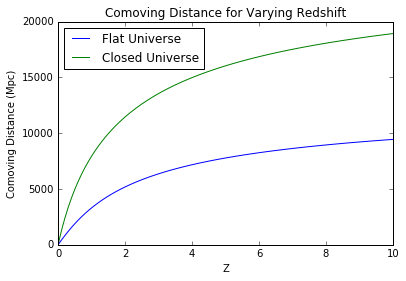

In [146]:
H_0 = 70.0
c = 3.0e8
z= np.linspace(0,10,100)


def dist(H_0, Omega_r, Omega_m, Omega_l, z):
    Omega_0 = 1
    return c/((H_0*(3.241e-20))*np.sqrt(Omega_r*(1.0+z)**4.0 + Omega_m*(1.0+z)**3.0 + Omega_l + (1-Omega_0)*(1+z)**2.0))

flat = lambda z: dist(H_0, 0.0,0.3, 0.7, z)
closed = lambda z: dist(H_0, 0.0, 0.1, 0.0, z)
flat_dist = np.array([])
closed_dist = np.array([])

for redshift in z:
    ans = quad(flat, 0, redshift)
    flat_dist = np.append(flat_dist, ans[0])
    ans = quad(closed, 0, redshift)
    closed_dist = np.append(closed_dist, ans[0])


plt.plot(z, flat_dist*3.24e-23, label = "Flat Universe")
plt.plot(z, closed_dist*3.24e-23, label = "Closed Universe")
plt.xlabel("Z")    
plt.ylabel("Comoving Distance (Mpc)")
plt.legend(loc="upper left")
plt.title("Comoving Distance for Varying Redshift")
plt.show()

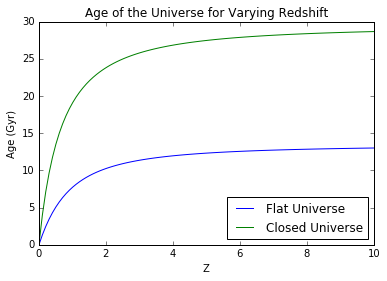

In [147]:
def age(H_0, Omega_r, Omega_m, Omega_l, z):
    Omega_0 = 1
    return 1/((H_0*(1.022e-3))*np.sqrt(Omega_r*(1.0+z)**4.0 + Omega_m*(1.0+z)**3.0 + Omega_l + (1-Omega_0)*(1+z)**2.0))/(1+z)

flat_t = lambda z: age(H_0, 0.0,0.3, 0.7, z)
closed_t = lambda z: age(H_0, 0.0, 0.1, 0.0, z)
flat_age = np.array([])
closed_age = np.array([])

for redshift in z:
    ans = quad(flat_t, 0, redshift)
    flat_age = np.append(flat_age, ans[0])
    ans = quad(closed_t, 0, redshift)
    closed_age = np.append(closed_age, ans[0])
    
plt.plot(z, flat_age, label = "Flat Universe")
plt.plot(z, closed_age, label = "Closed Universe")
plt.xlabel("Z")    
plt.ylabel("Age (Gyr)")
plt.legend(loc="lower right")
plt.title("Age of the Universe for Varying Redshift")
plt.show()


__Question 2__

Now I just have to solve two equations essentially. I have to solve for the age of the benchmark universe, with parameters $\Omega_{m,0}=0.3$, $\Omega_{r,0}=0$, and $\Omega_{\Lambda,0}=0.7$ and solve for the $\Omega_{r,0}$ of a radiation-only universe of the same age. In order to maintain some form of sanity I rounded these ages so that I could more easily find the $\Omega_{r,0}$ value that got me to that age. Because of this, at the bottom of my code you will see a number of possible answers for $\Omega_{r,0}$ that vary slightly (from 0.00124 to 0.00128). Essentially the value for $\Omega_{r,0}$ we are looking for is ~0.001246.

In [149]:
def age(H_0, Omega_r, Omega_m, Omega_l, Omega_0, z):
    return 1/((H_0*(1.022e-3))*np.sqrt(Omega_r*(1.0+z)**4.0 + Omega_m*(1.0+z)**3.0 + Omega_l + (1-Omega_0)*(1+z)**2.0))/(1+z)

age1 = quad(lambda z: age(H_0, 0.0, 0.3, 0.7, 1, z), 0, 1000)
age_of_benchmark_universe =  age1[0]  
x = "%.2f" % age_of_benchmark_universe
print('The age of the benchmark universe is', x, 'Gyrs' )

def radiationage(H_0, Omega_r, z):
    return 1/(((H_0)*(1.022e-3)*np.sqrt(Omega_r*(1.0+z)**4.0+ (1-Omega_r)*(1+z)**2.0))*(1+z))

n = np.linspace(0,1,100000)
print("Any of the following values for Omega_r would give us the same age as the benchmark universe:")
for Omega_r in n:
    age2 = quad(lambda z: radiationage(H_0, Omega_r, z), 0, 100)
    y = '%.2f' % age2[0]
    #print(y)
    if y ==  x:
        print(Omega_r)


The age of the benchmark universe is 13.48 Gyrs
Any of the following values for Omega_r would give us the same age as the benchmark universe:
0.00124001240012
0.00125001250013
0.00126001260013
0.00127001270013
0.00128001280013
